In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.neighbors import NearestCentroid

In [2]:
categories = ['sci.space','rec.motorcycles','comp.graphics','sci.med','sci.electronics']
train_data = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=42)

In [3]:
test_data.data.__len__()

1970

In [4]:
count_vect = CountVectorizer()
data= count_vect.fit_transform(train_data.data+test_data.data)

In [5]:
trainx=data[:train_data.data.__len__()]
testx=data[train_data.data.__len__():]

In [6]:
trainy=train_data.target
testy=test_data.target

In [7]:
tfidf_transformer = TfidfTransformer()
trainx_tfidf = tfidf_transformer.fit_transform(trainx)
testx_tfidf = tfidf_transformer.fit_transform(testx)

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)
clf = knn.fit(trainx_tfidf,trainy)
y_pred_knn = clf.predict(testx_tfidf)
score_knn = metrics.accuracy_score(testy, y_pred_knn)
print("Accuracy of the trained KNN model is: "+str(100*score_knn )+"%")

Accuracy of the trained KNN model is: 81.67512690355329%


In [9]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(trainx_tfidf,trainy)
y_pred_nb = naive_bayes_classifier.predict(testx)
score_nb = metrics.accuracy_score(testy, y_pred_nb)
print("Accuracy of the trained Naive Bayes model is: "+str(100*score_nb)+"%")


Accuracy of the trained Naive Bayes model is: 84.36548223350255%


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
metric="euclidean"
vectorizer=TfidfVectorizer()
trainX = vectorizer.fit_transform(train_data.data) 
trainy = train_data.target
vectorizer=TfidfVectorizer()
trainX = vectorizer.fit_transform(train_data.data) 
trainy = train_data.target
n_samples, n_features = trainX.shape
le = LabelEncoder()
y_indices = le.fit_transform(trainy)
classes = le.classes_
n_classes = classes.size
centroids = np.empty((n_classes, n_features), dtype=np.float64)
n_cluster = np.zeros(n_classes)
for current_class in range(n_classes):
    center_mask = y_indices == current_class
    n_cluster[current_class] = np.sum(center_mask)
    centroids[current_class] = trainX[center_mask].mean(axis=0)
def get_vectorizer_array(query):
    return vectorizer.transform([query]).toarray()
def pred(X):
    return classes[pairwise_distances(X, centroids, metric=metric).argmin(axis=1)]
testdata = [[a_, b_] for a_, b_ in zip(test_data.data,test_data.target)]
y_pred_rcc=[pred(get_vectorizer_array(testcase[0]))[0] for testcase in testdata]
score_rcc = metrics.accuracy_score(testy, y_pred_rcc)

print("Accuracy of the trained Rocchio Classification model is: "+str(100*score_rcc)+"%")

Accuracy of the trained Rocchio Classification model is: 80.30456852791879%


In [60]:
np.array(y_pred_rcc)

array([1, 1, 3, ..., 0, 0, 1], dtype=int64)

In [25]:
indices0=[]
indices1=[]
indices2=[]
indices3=[]
indices4=[]
for i in range(list(test_data.target).__len__()):
    if list(test_data.target)[i]==0:
        indices0.append(i)
    elif list(test_data.target)[i]==1:
        indices1.append(i)
    elif list(test_data.target)[i]==2:
        indices2.append(i)
    elif list(test_data.target)[i]==3:
        indices3.append(i)
    elif list(test_data.target)[i]==4:
        indices4.append(i)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque
def nclass_classification_mosaic_plot(n_classes, results):
    class_lists = [range(n_classes)]*2
    mosaic_tuples = tuple(itertools.product(*class_lists))
    
    res_list = results[0]
    for i, l in enumerate(results):
        if i == 0:
            pass
        else:
            tmp = deque(l)
            tmp.rotate(-i)
            res_list.extend(tmp)
    data = {t:res_list[i] for i,t in enumerate(mosaic_tuples)}

    fig, ax = plt.subplots(figsize=(11, 10))
    plt.rcParams.update({'font.size': 16})

    font_color = '#2c3e50'
    pallet = [
        '#6a89cc', 
        '#4a69bd', 
        '#1e3799', 
        '#0c2461',
        '#82ccdd',
        '#60a3bc',
    ]
    colors = deque(pallet[:n_classes])
    all_colors = []
    for i in range(n_classes):
        if i > 0:
            colors.rotate(-1)
        all_colors.extend(colors)

    props = {(str(a), str(b)):{'color':all_colors[i]} for i,(a, b) in enumerate(mosaic_tuples)}

    labelizer = lambda k: ''

    p = mosaic(data, labelizer=labelizer, properties=props, ax=ax)

    title_font_dict = {
        'fontsize': 20,
        'color' : font_color,
    }
    axis_label_font_dict = {
        'fontsize': 16,
        'color' : font_color,
    }

    ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax.axes.yaxis.set_ticks([])
    ax.tick_params(axis='x', which='major', labelsize=14)

    ax.set_title('Classification Report', fontdict=title_font_dict, pad=25)
    ax.set_xlabel('Observed Class', fontdict=axis_label_font_dict, labelpad=10)
    ax.set_ylabel('Predicted Class', fontdict=axis_label_font_dict, labelpad=35)

    legend_elements = [Patch(facecolor=all_colors[i], label='Class {}'.format(i)) for i in range(n_classes)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1,1.018), fontsize=16)
    plt.tight_layout()
    plt.show()

In [61]:
li_nb=[]
temp0=0
temp1=0
temp2=0
temp3=0
temp4=0
for j in indices0:
    if list(np.array(y_pred_rcc))[j]==0:
        temp0+=1
    elif list(np.array(y_pred_rcc))[j]==1:
        temp1+=1
    elif list(np.array(y_pred_rcc))[j]==2:
        temp2+=1
    elif list(np.array(y_pred_rcc))[j]==3:
        temp3+=1
    elif list(np.array(y_pred_rcc))[j]==4:
        temp4+=1
li_nb.append([temp0,temp1,temp2,temp3,temp4])
temp0=0
temp1=0
temp2=0
temp3=0
temp4=0
for j in indices1:
    if list(np.array(y_pred_rcc))[j]==0:
        temp0+=1
    elif list(np.array(y_pred_rcc))[j]==1:
        temp1+=1
    elif list(np.array(y_pred_rcc))[j]==2:
        temp2+=1
    elif list(np.array(y_pred_rcc))[j]==3:
        temp3+=1
    elif list(np.array(y_pred_rcc))[j]==4:
        temp4+=1
li_nb.append([temp0,temp1,temp2,temp3,temp4])
temp0=0
temp1=0
temp2=0
temp3=0
temp4=0
for j in indices2:
    if list(np.array(y_pred_rcc))[j]==0:
        temp0+=1
    elif list(np.array(y_pred_rcc))[j]==1:
        temp1+=1
    elif list(np.array(y_pred_rcc))[j]==2:
        temp2+=1
    elif list(np.array(y_pred_rcc))[j]==3:
        temp3+=1
    elif list(np.array(y_pred_rcc))[j]==4:
        temp4+=1
li_nb.append([temp0,temp1,temp2,temp3,temp4])
temp0=0
temp1=0
temp2=0
temp3=0
temp4=0
for j in indices3:
    if list(np.array(y_pred_rcc))[j]==0:
        temp0+=1
    elif list(np.array(y_pred_rcc))[j]==1:
        temp1+=1
    elif list(np.array(y_pred_rcc))[j]==2:
        temp2+=1
    elif list(np.array(y_pred_rcc))[j]==3:
        temp3+=1
    elif list(np.array(y_pred_rcc))[j]==4:
        temp4+=1
li_nb.append([temp0,temp1,temp2,temp3,temp4])
temp0=0
temp1=0
temp2=0
temp3=0
temp4=0
for j in indices4:
    if list(np.array(y_pred_rcc))[j]==0:
        temp0+=1
    elif list(np.array(y_pred_rcc))[j]==1:
        temp1+=1
    elif list(np.array(y_pred_rcc))[j]==2:
        temp2+=1
    elif list(np.array(y_pred_rcc))[j]==3:
        temp3+=1
    elif list(np.array(y_pred_rcc))[j]==4:
        temp4+=1
li_nb.append([temp0,temp1,temp2,temp3,temp4])

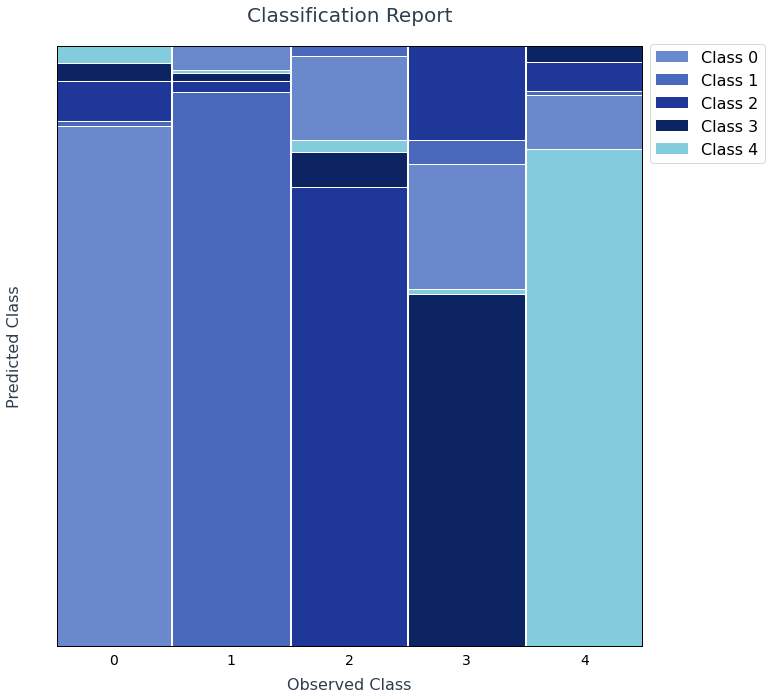

In [62]:
nclass_classification_mosaic_plot(5,li_nb)

In [58]:
from sklearn.metrics import classification_report
target_names = categories

In [59]:
print(classification_report(testy, y_pred_nb, target_names=target_names))

                 precision    recall  f1-score   support

      sci.space       0.94      0.69      0.80       389
rec.motorcycles       0.93      0.97      0.95       398
  comp.graphics       0.93      0.67      0.78       393
        sci.med       0.69      0.94      0.80       396
sci.electronics       0.83      0.95      0.89       394

       accuracy                           0.84      1970
      macro avg       0.86      0.84      0.84      1970
   weighted avg       0.86      0.84      0.84      1970



In [60]:
print(classification_report(testy, y_pred_knn, target_names=target_names))

                 precision    recall  f1-score   support

      sci.space       0.80      0.80      0.80       389
rec.motorcycles       0.80      0.94      0.87       398
  comp.graphics       0.82      0.66      0.73       393
        sci.med       0.85      0.79      0.82       396
sci.electronics       0.81      0.89      0.85       394

       accuracy                           0.82      1970
      macro avg       0.82      0.82      0.81      1970
   weighted avg       0.82      0.82      0.81      1970



In [61]:
print(classification_report(testy, y_pred_rcc, target_names=target_names))

                 precision    recall  f1-score   support

      sci.space       0.65      0.88      0.74       389
rec.motorcycles       0.94      0.93      0.94       398
  comp.graphics       0.73      0.77      0.75       393
        sci.med       0.83      0.59      0.69       396
sci.electronics       0.94      0.84      0.89       394

       accuracy                           0.80      1970
      macro avg       0.82      0.80      0.80      1970
   weighted avg       0.82      0.80      0.80      1970

